# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
cities

616


['kargasok',
 'illoqqortoormiut',
 'flinders',
 'severo-kurilsk',
 'kapaa',
 'punta arenas',
 'busselton',
 'boddam',
 'porto velho',
 'hobart',
 'mar del plata',
 'chokurdakh',
 'albany',
 'dikson',
 'rayon',
 'sunrise manor',
 'amderma',
 'qaanaaq',
 'kuala lipis',
 'ushuaia',
 'halalo',
 'tasbuget',
 'nicoya',
 'baft',
 'bethel',
 'henties bay',
 'atuona',
 'samarai',
 'georgetown',
 'marzuq',
 'port alfred',
 'vaini',
 'vila',
 'palabuhanratu',
 'ponta do sol',
 'lebu',
 'kiunga',
 'malanville',
 'kalabo',
 'dubovskoye',
 'magnitka',
 'airai',
 'nikolskoye',
 'arawa',
 'mehamn',
 'bilma',
 'carnarvon',
 'torbay',
 'bambous virieux',
 'saskylakh',
 'changping',
 'jining',
 'gizo',
 'port hardy',
 'olafsvik',
 'muriti',
 'shetpe',
 'mount gambier',
 'mataura',
 'urdoma',
 'alice springs',
 'tiksi',
 'puerto ayora',
 'bluff',
 'acuna',
 'raudeberg',
 'touros',
 'lithakia',
 'bredasdorp',
 'new norfolk',
 'kavieng',
 'tucupita',
 'cape town',
 'luderitz',
 'macae',
 'tuktoyaktuk',
 'ba

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url= "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url =f"{url}appid={weather_api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=bc7ee0f10dae2525ad6f44af80c01a07&units=imperial&q='

In [4]:
# create empty list
City= []
temp=[]
lat=[]
long=[]
humidity=[]
cloudiness=[]
wind_speed=[]
date=[]
country = []

city_counter = 1
for x in cities:
    
    #response=requests.get(query_url + x).json()     
    try:  
        response=requests.get(query_url + x).json()
        City.append(response["name"])
        temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        city_name = response["name"]
        
        print(f"Data acqusition for {city_name}")
        city_counter = city_counter +1
    
    except (KeyError, IndexError):
        print("The city was not found.... !!")
        

#Tell when data acqusition ends
print("------------------&&------------")
print("Data Acqusition complete ")
        

Data acqusition for Kargasok
The city was not found.... !!
Data acqusition for Flinders
Data acqusition for Severo-Kuril'sk
Data acqusition for Kapaa
Data acqusition for Punta Arenas
Data acqusition for Busselton
Data acqusition for Boddam
Data acqusition for Porto Velho
Data acqusition for Hobart
Data acqusition for Mar del Plata
Data acqusition for Chokurdakh
Data acqusition for Albany
Data acqusition for Dikson
Data acqusition for Santa María Rayón
Data acqusition for Sunrise Manor
The city was not found.... !!
Data acqusition for Qaanaaq
Data acqusition for Kuala Lipis
Data acqusition for Ushuaia
The city was not found.... !!
The city was not found.... !!
Data acqusition for Nicoya
Data acqusition for Baft
Data acqusition for Bethel
Data acqusition for Henties Bay
Data acqusition for Atuona
Data acqusition for Samarai
Data acqusition for George Town
Data acqusition for Marzuq
Data acqusition for Port Alfred
Data acqusition for Vaini
Data acqusition for Vila
The city was not found..

Data acqusition for Lagoa
Data acqusition for Saint-François
Data acqusition for Skellefteå
Data acqusition for Codrington
Data acqusition for Namie
Data acqusition for Bengkulu
Data acqusition for Port Keats
Data acqusition for Bridgetown
The city was not found.... !!
Data acqusition for Norman Wells
Data acqusition for Revyakino
Data acqusition for Beloha
Data acqusition for Stephenville
Data acqusition for Saint Anthony
Data acqusition for Mackay
Data acqusition for Ternate
Data acqusition for Labuhan
Data acqusition for Inhambane
Data acqusition for Suntar
Data acqusition for Carini
Data acqusition for Bacolod City
Data acqusition for Buerarema
Data acqusition for Hasaki
Data acqusition for Saint-Joseph
Data acqusition for Ahipara
Data acqusition for Shangrao
Data acqusition for Urucará
Data acqusition for Berlevåg
Data acqusition for Provideniya
Data acqusition for Wukari
Data acqusition for India
Data acqusition for Srednekolymsk
Data acqusition for Rojhan
Data acqusition for Sev

Data acqusition for La Tuque
Data acqusition for Davila
Data acqusition for Nchelenge
Data acqusition for Yaan
Data acqusition for Camaná
Data acqusition for Yenotayevka
Data acqusition for Ugoofaaru
Data acqusition for Portobelo
Data acqusition for Ishinomaki
Data acqusition for Saint-Augustin
Data acqusition for Iquitos
Data acqusition for Boa Vista
Data acqusition for Myanaung
Data acqusition for Gravdal
Data acqusition for Paclolo
Data acqusition for Pudozh
Data acqusition for Bezhetsk
Data acqusition for Hearst
Data acqusition for Tara
Data acqusition for Fareydūnshahr
Data acqusition for Castelbuono
Data acqusition for Arman'
Data acqusition for Te Anau
Data acqusition for Myitkyina
Data acqusition for Khuzhir
Data acqusition for Christchurch
Data acqusition for San Fernando
The city was not found.... !!
Data acqusition for Willowmore
Data acqusition for Phanom Thuan
Data acqusition for Itarema
Data acqusition for Rawson
Data acqusition for Bowmore
Data acqusition for Mayo
Data a

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_data = {"City Name": City, "Country": country, "Date": date, "Temperature": temp, "Latitude": lat,
            "Longitude": long, "Humidity": humidity, "Cloudiness": cloudiness,  "Wind Speed": wind_speed, 
            }
city_df=pd.DataFrame(city_data)

In [6]:
city_df.head()

,City Name,Country,Date,Temperature,Latitude,Longitude,Humidity,Cloudiness,Wind Speed
0,Kargasok,RU,1596062214,54.46,59.06,80.86,92,100,12.82
1,Flinders,AU,1596062452,55.00,-34.58,150.86,87,0,7.00
2,Severo-Kuril'sk,RU,1596062286,55.76,50.68,156.12,81,98,13.40
3,Kapaa,US,1596062453,82.40,22.08,-159.32,69,20,18.34
4,Punta Arenas,CL,1596062453,39.20,-53.15,-70.92,80,99,13.87


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
city_df.sort_values(by=['Humidity'], inplace=True, ascending=False)
city_df

,City Name,Country,Date,Temperature,Latitude,Longitude,Humidity,Cloudiness,Wind Speed
443,Daytona Beach,US,1596062535,77.00,29.21,-81.02,100,90,4.70
230,Zelenogorskiy,RU,1596062496,59.00,55.03,87.00,100,40,4.47
144,Salalah,OM,1596062479,80.60,17.02,54.09,100,75,6.93
258,Skellefteå,SE,1596062270,60.01,64.75,20.95,100,100,5.82
511,Osypenko,UA,1596062551,73.99,46.91,36.83,100,0,10.00
...,...,...,...,...,...,...,...,...,...
124,Saint George,US,1596062429,107.01,37.10,-113.58,6,1,12.75
14,Sunrise Manor,US,1596062455,111.20,36.21,-115.07,4,20,3.36
158,Ngunguru,NZ,1596062482,59.00,-35.62,174.50,3,100,10.00
373,Kaeo,NZ,1596062182,59.00,-35.10,173.78,3,100,5.99


In [8]:
#  Get the indices of cities that have humidity over 100%.
high_humidity = city_df.loc[(city_df["Humidity"]>=100)].index
high_humidity

Int64Index([443, 230, 144, 258, 511, 402,  41, 425, 238, 137, 136, 165, 479,
             52, 201, 200, 569],
           dtype='int64')

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
city_df=city_df.drop(high_humidity)
clean_city_data= {
        "City Name": City, "Country": country, "Date": date, "Temperature": temp, "Latitude": lat,
            "Longitude": long, "Humidity": humidity, "Cloudiness": cloudiness,  "Wind Speed": wind_speed, 
            }
clean_city_data=pd.DataFrame(clean_city_data)
clean_city_data

,City Name,Country,Date,Temperature,Latitude,Longitude,Humidity,Cloudiness,Wind Speed
0,Kargasok,RU,1596062214,54.46,59.06,80.86,92,100,12.82
1,Flinders,AU,1596062452,55.00,-34.58,150.86,87,0,7.00
2,Severo-Kuril'sk,RU,1596062286,55.76,50.68,156.12,81,98,13.40
3,Kapaa,US,1596062453,82.40,22.08,-159.32,69,20,18.34
4,Punta Arenas,CL,1596062453,39.20,-53.15,-70.92,80,99,13.87
...,...,...,...,...,...,...,...,...,...
566,Rocha,UY,1596062488,40.17,-34.48,-54.33,83,0,0.83
567,Jiaocheng,CN,1596062561,79.02,24.68,116.14,82,100,1.34
568,Port-Gentil,GA,1596062561,77.00,-0.72,8.78,83,75,14.32
569,Sri Aman,MY,1596062561,73.40,1.24,111.46,100,100,2.48


In [10]:
# Extract relevant fields from the data frame

# Export the City_Data into a csv
clean_city_data.to_csv(r'../output_data/clean_cities.csv')
print(len(clean_city_data))

571


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

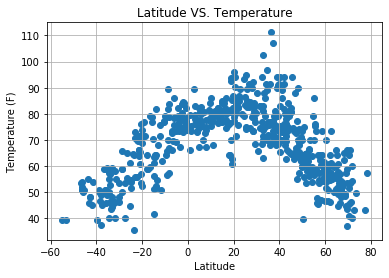

In [11]:
plt.scatter(clean_city_data["Latitude"], clean_city_data["Temperature"], marker="o")

plt.title("Latitude VS. Temperature")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig(r"../Images/Latitudeandtemperature.png")

plt.show()
#This graph shows lower temperatures are reached at opposite spectrums of latitude. 
# The highest temperatures being reached around a latitude of 30.

## Latitude vs. Humidity Plot

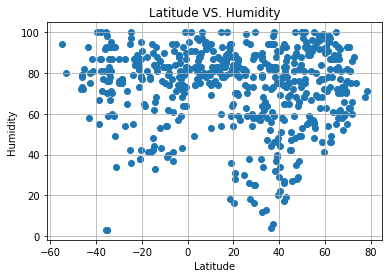

In [12]:
plt.scatter(clean_city_data["Latitude"], clean_city_data["Humidity"], marker="o")

plt.title("Latitude VS. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig(r"../Images/Latitudeandhumidity.png")

plt.show()
#This graph shows high humidity is not limited to a specific latitude. 

## Latitude vs. Cloudiness Plot

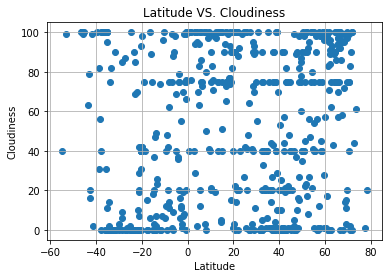

In [13]:
plt.scatter(clean_city_data["Latitude"], clean_city_data["Cloudiness"], marker="o")

plt.title("Latitude VS. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig(r"../Images/Latitudeandcloudiness.png")

plt.show()
#This graph shows latitude and cloudiness do not have a good correlation.

## Latitude vs. Wind Speed Plot

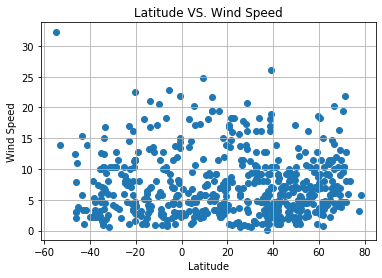

In [14]:
plt.scatter(clean_city_data["Latitude"], clean_city_data["Wind Speed"], marker="o")

plt.title("Latitude VS. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig(r"../Images/Latitudeandwindspeed.png")

plt.show()
#This graph shows wind speed mostly happens in positive latitude. 

## Linear Regression

In [15]:
# After each pair of plots explain what the linear regression is modeling such as any relationships you notice 
# and any other analysis you may have.

# **Optional** You will be creating multiple linear regression plots. To optimize your code, 
#write a function that creates the linear regression plots.

In [16]:
# Create Northern and Southern Hemisphere DataFrames
north_hem = clean_city_data.loc[clean_city_data["Latitude"] >= 0]
north_hem
south_hem = clean_city_data.loc[clean_city_data["Latitude"] < 0]
south_hem

,City Name,Country,Date,Temperature,Latitude,Longitude,Humidity,Cloudiness,Wind Speed
1,Flinders,AU,1596062452,55.00,-34.58,150.86,87,0,7.00
4,Punta Arenas,CL,1596062453,39.20,-53.15,-70.92,80,99,13.87
5,Busselton,AU,1596062453,46.00,-33.65,115.33,95,82,6.58
7,Porto Velho,BR,1596062453,89.60,-8.76,-63.90,40,20,5.82
8,Hobart,AU,1596062227,48.00,-42.88,147.33,80,20,3.36
...,...,...,...,...,...,...,...,...,...
544,Rawson,AR,1596062557,45.84,-43.30,-65.10,58,79,15.35
549,São Fidélis,BR,1596062558,69.44,-21.65,-41.75,85,10,4.34
555,Illapel,CL,1596062153,58.01,-31.63,-71.17,49,0,0.65
566,Rocha,UY,1596062488,40.17,-34.48,-54.33,83,0,0.83


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

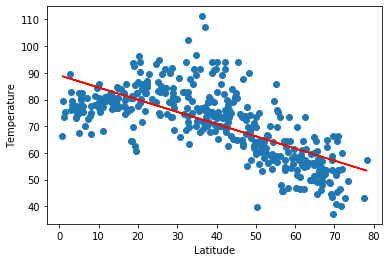

In [17]:
# # Perform a linear regression on temperature vs. latitude
x_values = north_hem['Latitude']
y_values = north_hem['Temperature']
plt.xlabel('Latitude')
plt.ylabel('Temperature')

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


plt.savefig(r"../Images/Northtempandlat.png")
# Show plot
plt.show()
#this linear regression is showing temperature decreases with lstitude.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

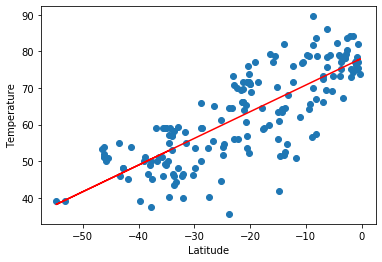

In [18]:
x_values = south_hem['Latitude']
y_values = south_hem['Temperature']
plt.xlabel('Latitude')
plt.ylabel('Temperature')

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


plt.savefig(r"../Images/Southtempandlat.png")
# Show plot
plt.show()
#This linear regression is showing temperature increases with latitude.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

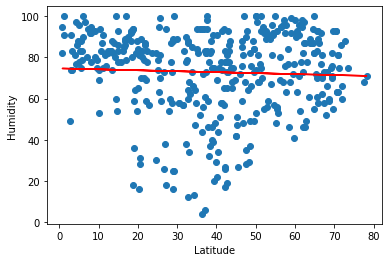

In [19]:
x_values = north_hem['Latitude']
y_values = north_hem['Humidity']
plt.xlabel('Latitude')
plt.ylabel('Humidity')

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


plt.savefig(r"../Images/Northhumidityandlat.png")
# Show plot
plt.show()
#This linear regression is showing their is no significant relationship between latitude and humidity. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

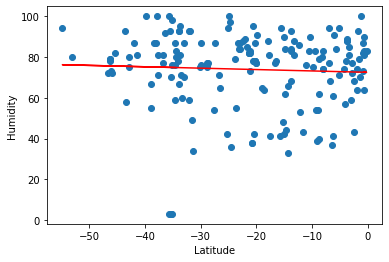

In [20]:
x_values = south_hem['Latitude']
y_values = south_hem['Humidity']
plt.xlabel('Latitude')
plt.ylabel('Humidity')

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


plt.savefig(r"../Images/southhumidityandlat.png")
# Show plot
plt.show()
#This linear regression is showing their is no significant relationship between latitude and humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

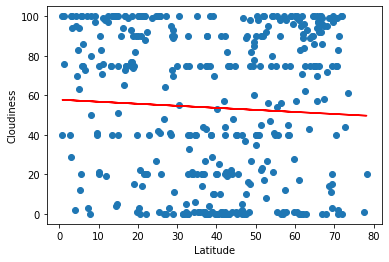

In [21]:
x_values = north_hem['Latitude']
y_values = north_hem['Cloudiness']
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


plt.savefig(r"../Images/Northcloudinessandlat.png")
# Show plot
plt.show()
#This linear regression is showing #This linear regression is showing a small decrease in cloudiness with increasing temperature.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

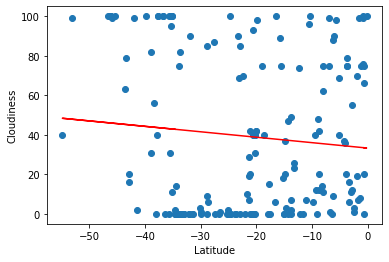

In [22]:
x_values = south_hem['Latitude']
y_values = south_hem['Cloudiness']
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


plt.savefig(r"../Images/Southcloudinessandlat.png")
# Show plot
plt.show()
#This linear regression is showing #This linear regression is showing a small decrease in cloudiness with increasing temperature

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

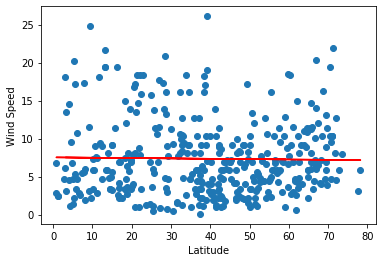

In [23]:
x_values = north_hem['Latitude']
y_values = north_hem['Wind Speed']
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


plt.savefig(r"../Images/Northwindandlat.png")
# Show plot
plt.show()
#This linear regression is showing no relationship between wind speed and latitude.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

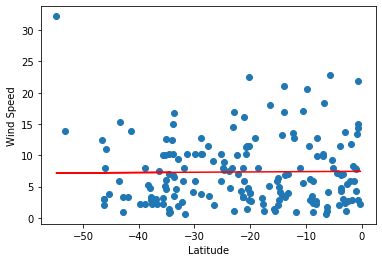

In [24]:
x_values = south_hem['Latitude']
y_values = south_hem['Wind Speed']
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


plt.savefig(r"../Images/Southtwindandlat.png")
# Show plot
plt.show()
#This linear regression is showing no relationship between wind speed and latitude.